## Finpro Stage 1 - EDA - Application Train - Partition num6

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  2.2.2
seaborn version :  0.12.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [4]:
# Load the data from the CSV file
data = pd.read_csv("application_train.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())


First few rows of the dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Descriptive Statistics

In [5]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Pendekatan Numerik

In [7]:
# Pengelompokan kolom numerik dari dataset application_train
num6 = ['TARGET', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13']

In [8]:
# Menampilkan 5 baris pertama dari kolom-kolom yang ada di num1
data[num6].head()

,TARGET,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13
0,1,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
data[num6].describe()

,TARGET,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13
count,307511.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525
std,0.272419,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268
min,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,-274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [10]:
#Jumlah data yang null
data[num6].isna().sum()

TARGET                         0
DEF_60_CNT_SOCIAL_CIRCLE    1021
DAYS_LAST_PHONE_CHANGE         1
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
dtype: int64

In [11]:
# Hitung persentase missing value
missing_percentage = data[num6].isna().mean() * 100

# Menampilkan persentase missing value
print("Persentase Missing Value (%):")
print(missing_percentage)

# Loop untuk melakukan tindakan sesuai kriteria yang ditentukan
for col, pct in missing_percentage.items():
    if pct == 0:
        continue  # Tidak ada missing value, tidak melakukan apa-apa
    elif pct <= 5:
        # Drop baris yang memiliki missing value pada kolom ini
        data = data.dropna(subset=[col])
        print(f"Drop rows with missing values in column: {col} (Missing: {pct:.2f}%)")
    elif 5 < pct <= 20:
        # Mengisi missing value dengan median dari kolom tersebut
        median_value = data[col].median()
        data[col] = data[col].fillna(median_value)
        print(f"Fill missing values in column: {col} with median value (Missing: {pct:.2f}%)")
    else:
        # Drop kolom jika missing value lebih dari 20%
        data = data.drop(columns=[col])
        print(f"Drop column: {col} (Missing: {pct:.2f}%)")

# Tampilkan hasil akhir setelah penanganan missing value
display(data.head())


Persentase Missing Value (%):
TARGET                      0.000000
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
FLAG_DOCUMENT_2             0.000000
FLAG_DOCUMENT_3             0.000000
FLAG_DOCUMENT_4             0.000000
FLAG_DOCUMENT_5             0.000000
FLAG_DOCUMENT_6             0.000000
FLAG_DOCUMENT_7             0.000000
FLAG_DOCUMENT_8             0.000000
FLAG_DOCUMENT_9             0.000000
FLAG_DOCUMENT_10            0.000000
FLAG_DOCUMENT_11            0.000000
FLAG_DOCUMENT_12            0.000000
FLAG_DOCUMENT_13            0.000000
dtype: float64
Drop rows with missing values in column: DEF_60_CNT_SOCIAL_CIRCLE (Missing: 0.33%)
Drop rows with missing values in column: DAYS_LAST_PHONE_CHANGE (Missing: 0.00%)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

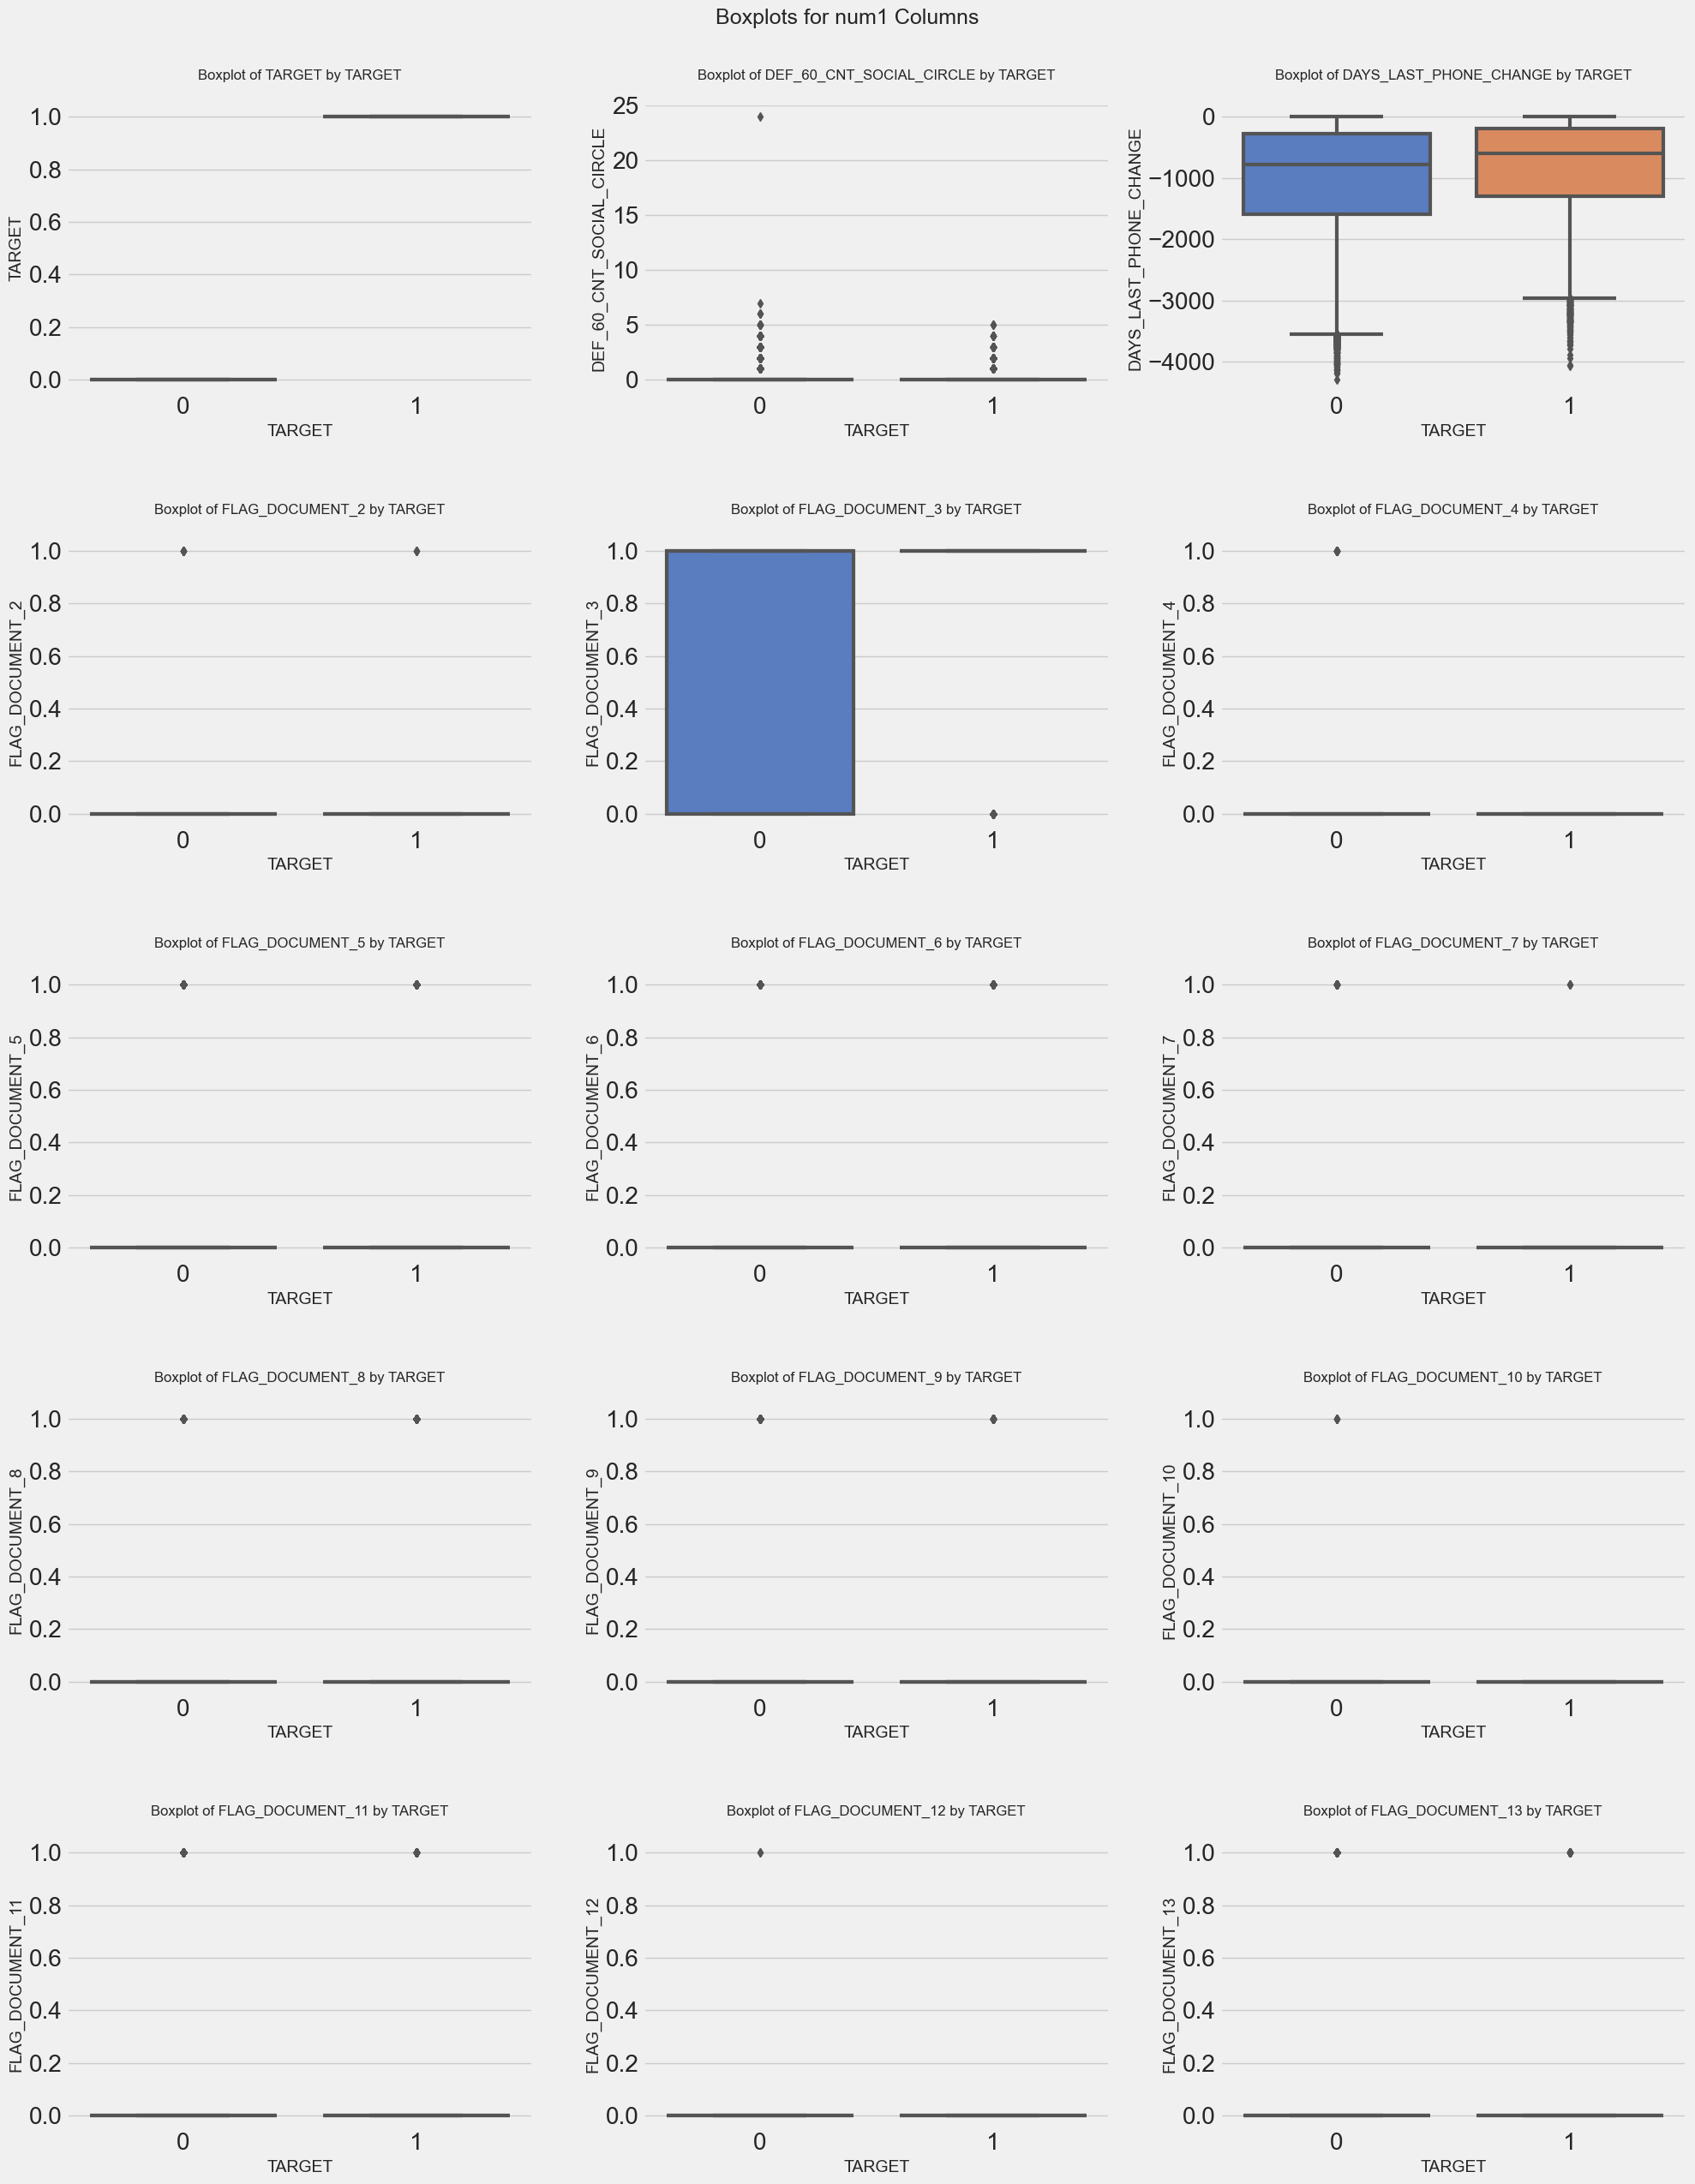

In [17]:
# Filter kolom-kolom di num1 dan num2 agar hanya mengambil kolom yang ada di data
valid_columns_num = [col for col in num6 if col in data.columns]

# Buat boxplot untuk setiap kolom di num1
n_cols = 3
n_rows = int(len(valid_columns_num) / n_cols) + (len(valid_columns_num) % n_cols > 0)

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(valid_columns_num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Boxplot of {col} by TARGET', fontsize=12, pad=20)  # Tambahkan pad untuk memberi jarak
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Boxplots for num1 Columns', fontsize=18, y=1.02)  # Tambahkan y untuk memberi jarak ke bawah
plt.subplots_adjust(hspace=0.5)  # Jarak antar subplot secara vertikal
plt.show()


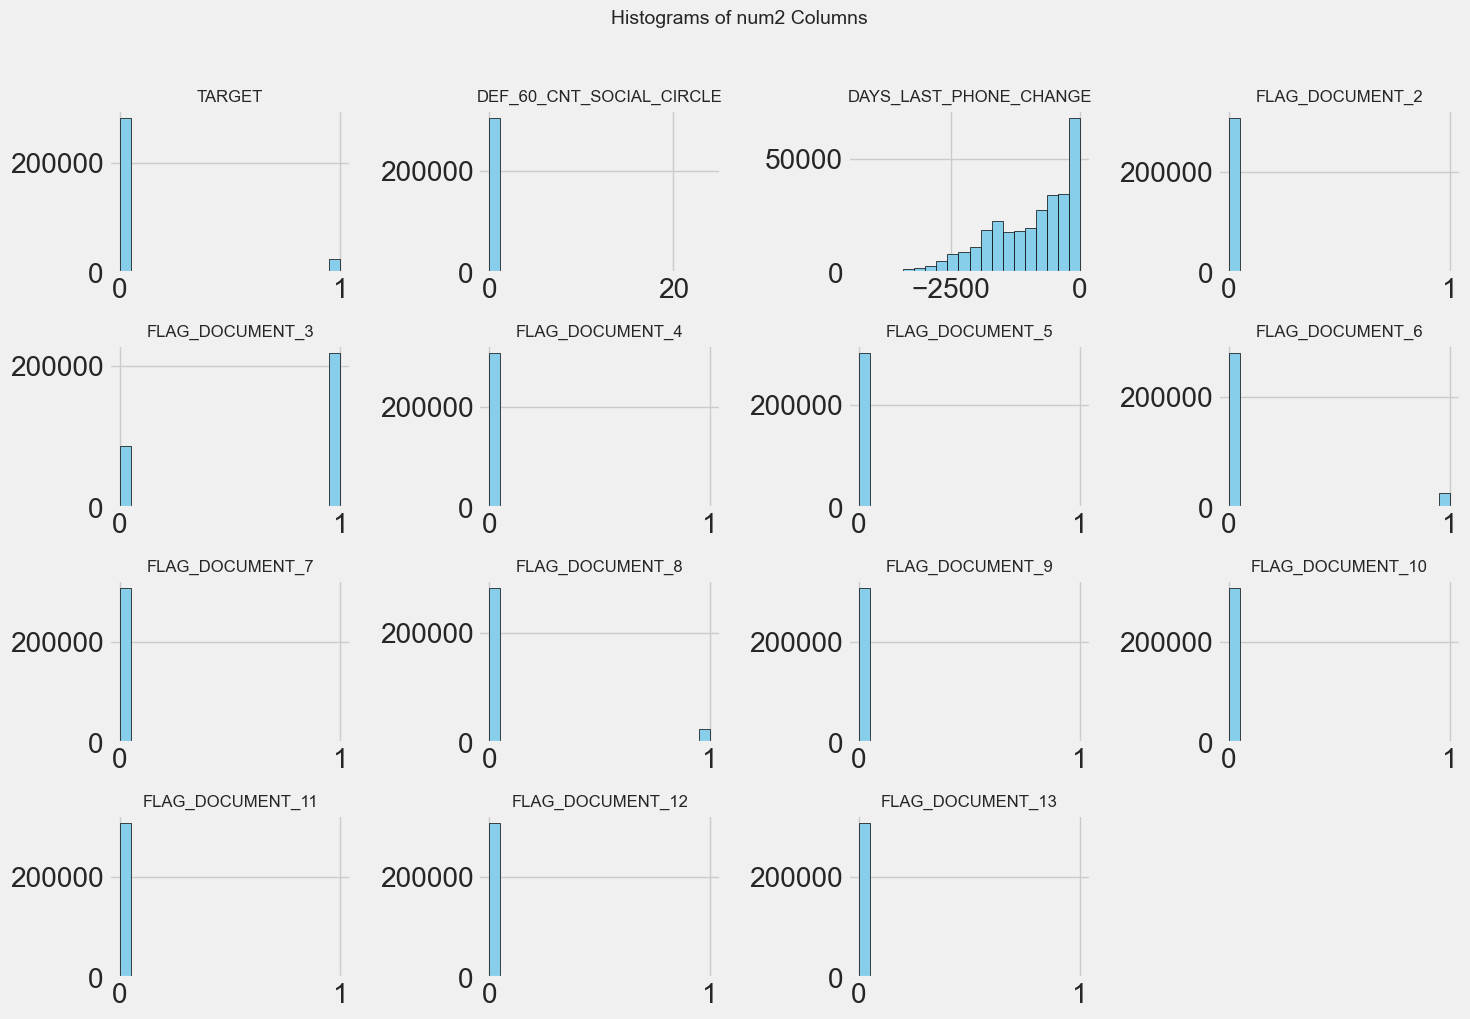

In [19]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns2 = [col for col in num6 if col in data.columns]

# Membuat histogram untuk setiap kolom yang valid
axes = data[valid_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')

# Mengatur ukuran font untuk setiap subplot title
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=12)  # Ukuran font title lebih kecil untuk setiap subplot

# Mengatur ukuran font untuk suptitle
plt.suptitle('Histograms of num2 Columns', fontsize=14, y=1.02)  # Ukuran font lebih kecil, dan jarak sedikit ke atas

# Tampilkan plot dengan pengaturan tata letak yang rapih
plt.tight_layout()
plt.show()


## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




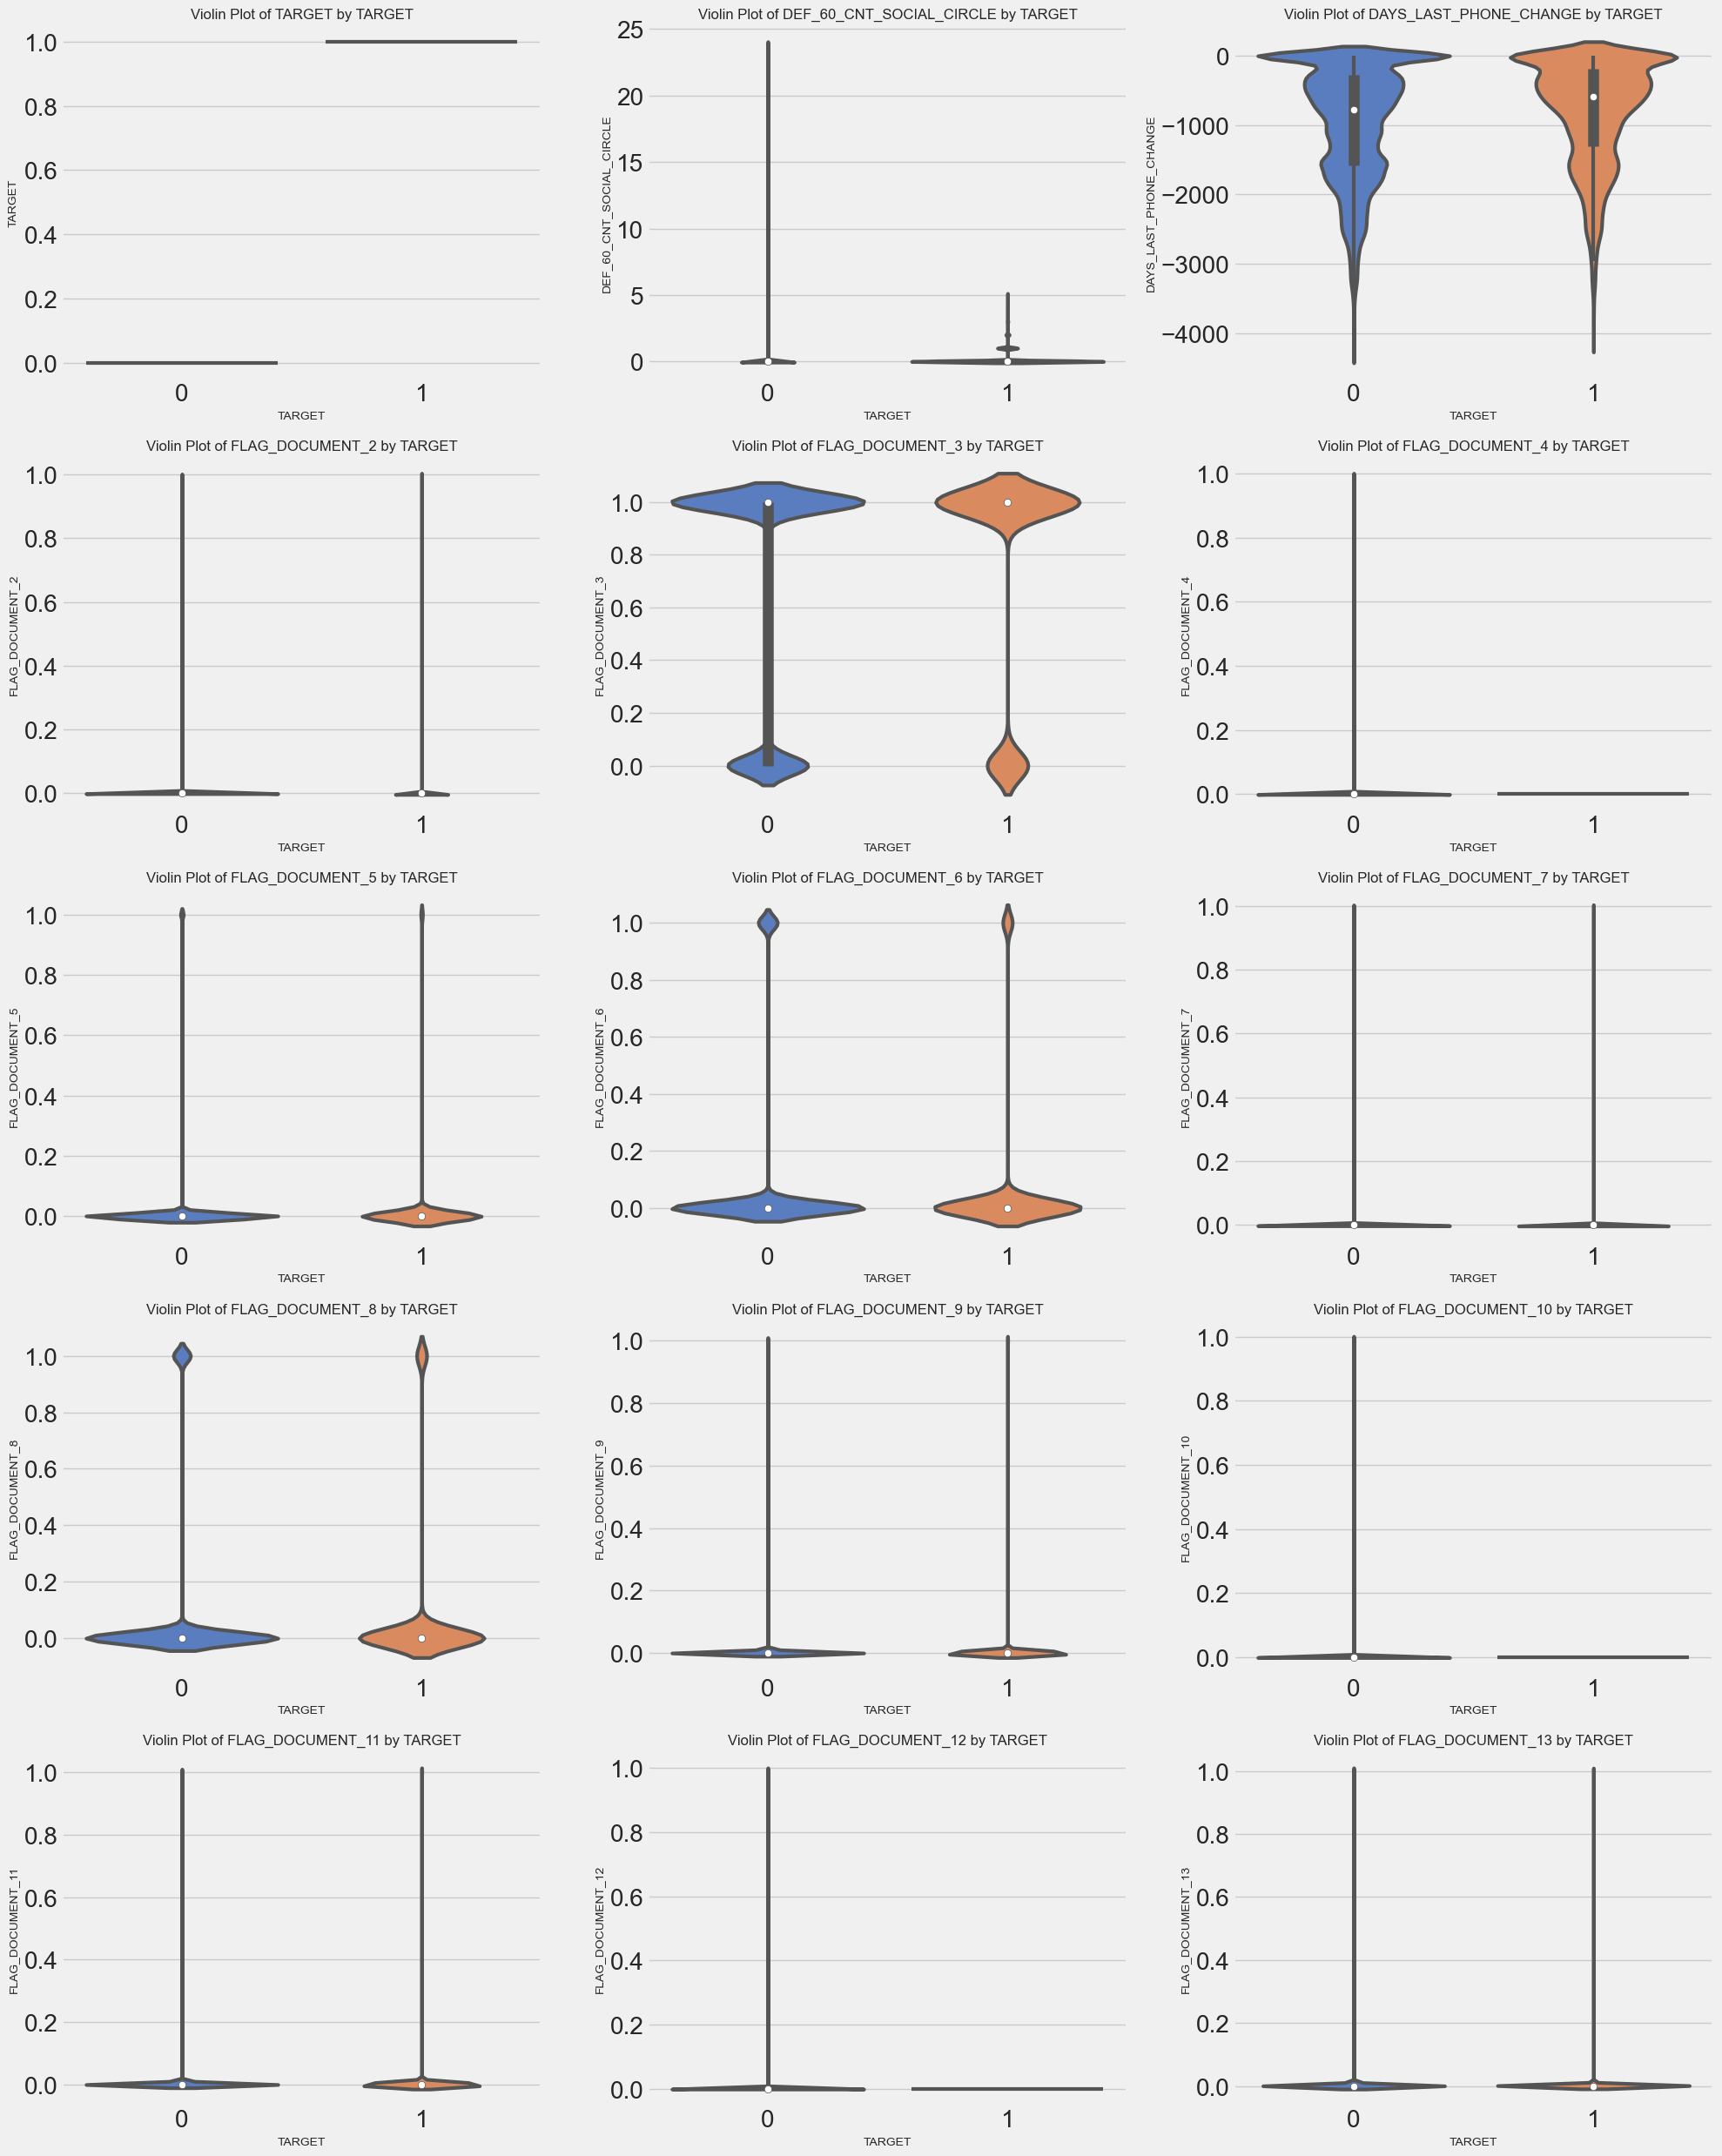

In [21]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns = [col for col in num6 if col in data.columns]

# Buat figure besar untuk menampung semua violin plot
n_cols = 3  # Jumlah kolom dalam grid
n_rows = int(len(valid_columns) / n_cols) + (len(valid_columns) % n_cols > 0)  # Hitung jumlah baris dalam grid

plt.figure(figsize=(20, 5 * n_rows))

# Plot violin plot untuk setiap kolom yang valid
for i, col in enumerate(valid_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Violin Plot of {col} by TARGET', fontsize=12)  # Mengatur ukuran font title
    plt.xlabel('TARGET', fontsize=10)  # Mengatur ukuran font label x-axis
    plt.ylabel(col, fontsize=10)  # Mengatur ukuran font label y-axis
    plt.tight_layout()

# Tampilkan plot
plt.show()


# 3. Multivariate Analysis (10 Poin)

In [22]:
data[num6].corr()

,TARGET,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13
TARGET,1.000000,0.031276,0.055555,0.005418,0.043700,-0.002679,-0.000283,-0.028803,-0.001471,-0.008197,-0.004309,-0.001418,-0.004268,-0.000758,-0.011626
DEF_60_CNT_SOCIAL_CIRCLE,0.031276,1.000000,0.002001,0.002350,0.011761,-0.002494,-0.004850,0.006215,0.000784,-0.017799,-0.004668,-0.001320,-0.002068,-0.000705,-0.007957
DAYS_LAST_PHONE_CHANGE,0.055555,0.002001,1.000000,-0.001493,-0.060957,0.000760,-0.013515,0.034901,0.003320,-0.010482,0.004005,-0.000037,0.044679,-0.004513,0.022253
FLAG_DOCUMENT_2,0.005418,0.002350,-0.001493,1.000000,-0.010249,-0.000059,-0.000807,-0.002027,-0.000090,-0.001942,-0.000407,-0.000031,-0.000409,-0.000017,-0.000388
FLAG_DOCUMENT_3,0.043700,0.011761,-0.060957,-0.010249,1.000000,-0.014213,-0.194993,-0.489868,-0.021649,-0.469149,-0.098326,-0.007520,-0.093939,-0.001198,-0.020660
FLAG_DOCUMENT_4,-0.002679,-0.002494,0.000760,-0.000059,-0.014213,1.000000,-0.001119,-0.002812,-0.000124,-0.002693,-0.000564,-0.000043,-0.000567,-0.000023,-0.000538
FLAG_DOCUMENT_5,-0.000283,-0.004850,-0.013515,-0.000807,-0.194993,-0.001119,1.000000,-0.038576,-0.001705,-0.036944,-0.007743,-0.000592,-0.007779,-0.000317,-0.007382
FLAG_DOCUMENT_6,-0.028803,0.006215,0.034901,-0.002027,-0.489868,-0.002812,-0.038576,1.000000,-0.004283,-0.092812,-0.019452,-0.001488,-0.018806,-0.000795,-0.017578
FLAG_DOCUMENT_7,-0.001471,0.000784,0.003320,-0.000090,-0.021649,-0.000124,-0.001705,-0.004283,1.000000,-0.004102,-0.000860,-0.000066,-0.000864,-0.000035,-0.000820
FLAG_DOCUMENT_8,-0.008197,-0.017799,-0.010482,-0.001942,-0.469149,-0.002693,-0.036944,-0.092812,-0.004102,1.000000,-0.018629,-0.001425,-0.017572,0.003903,0.076982


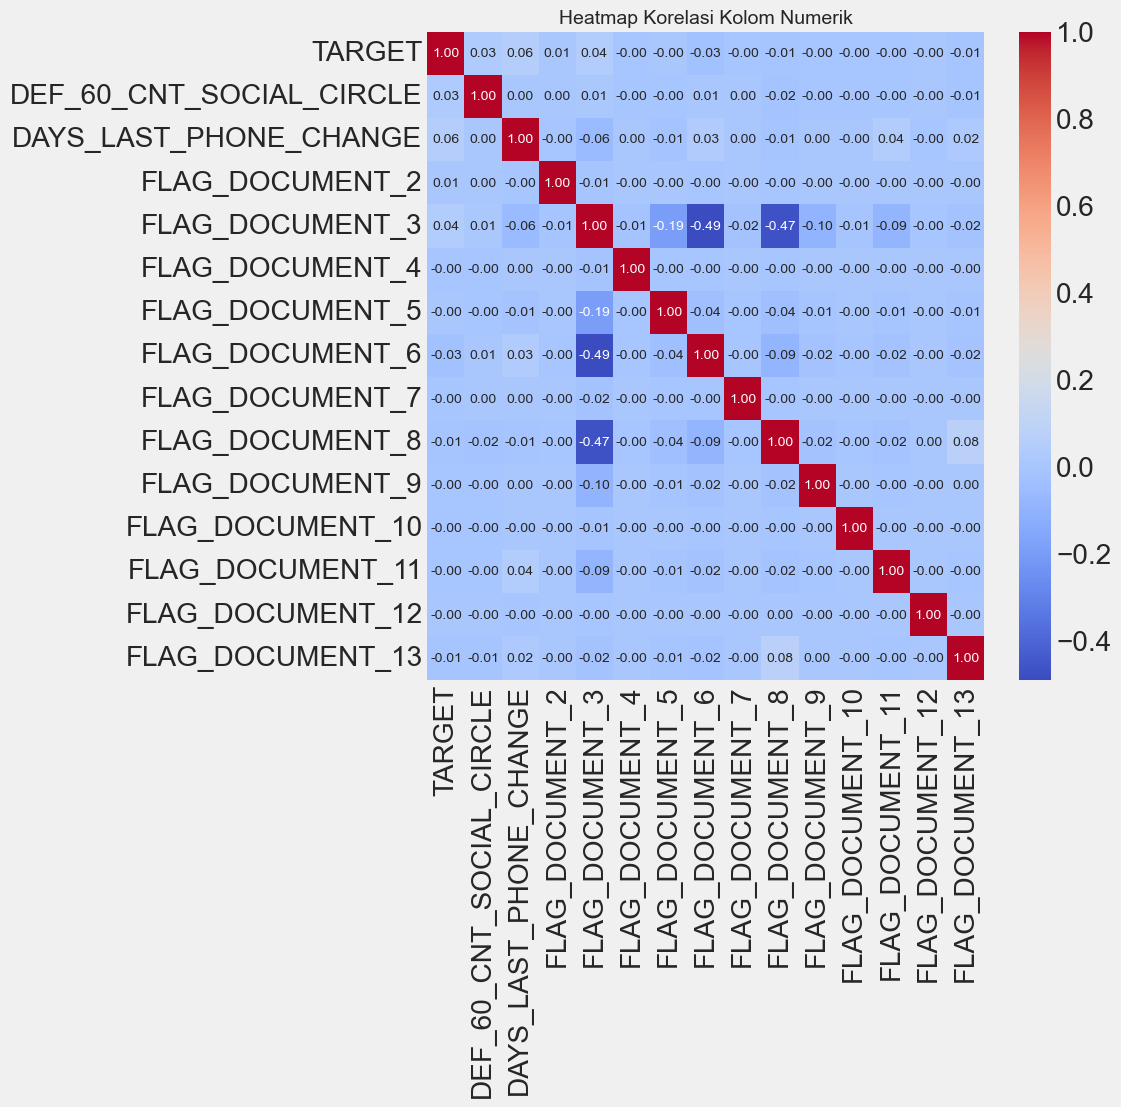

In [23]:
# Membuat heatmap dengan pengaturan ukuran font di dalam anotasi
plt.figure(figsize=(8, 8))
sns.heatmap(data[num6].corr(), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10})  # Mengatur ukuran font annotasi menjadi 10
plt.title('Heatmap Korelasi Kolom Numerik', fontsize=14)  # Mengatur ukuran font title
plt.show()
